### Instituto Tecnologico de Costa Rica (ITCR)
### Sede Interuniversitaria de Alajuela
### Escuela de Computacion
### Curso: Inteligencia Artificial
### Estudiantes: 

 - Brandon Ledezma Fernández - 2018185574
 - Walter Morales Vásquez - 2018212846

### Profesora:
 
 - Maria Auxiliadora Mora



# Tarea Programada Número 3
---
#### Introducción:
En este trabajo practico se aplicaran conceptos básicos de optimización, mínimos cuadrados y aprendizaje automático utilizando redes neuronales convencionales para resolver problemas de clasificación de imágenes todo utilizando el lenguaje Python, con la librería Pytorch.

El objetivo del trabajo es poner en practica el conocimiento adquirido en
clase sobre estos temas por medio de ejercicios que permitan al estudiante experimentar con ejemplos de uso.

In [1]:
import math
import numpy as np
from matplotlib import cm
import torch
import matplotlib.pyplot as plt


## A. Optimización (8 puntos)
 1. Optimización de funciones por el descenso de gradiente: Recuerde que el descenso del gradiente es un algoritmo de optimización que permite converger hacia el valor mínimo de una función mediante un proceso iterativo. En aprendizaje automático este método se utiliza para minimizar una función que mide el error de predicción del modelo en el conjunto de datos.
Para las siguientes funciones:

	 - $ f_{1}(x, y) = (x - 0,7)^{2}+(y - 0.5)^{2} con: x, y \in [-4 , 4] $
	 - $ f_{2}(x, y) = xe^{(-x^{2}-y^{2})}    con: x, y \in [-2 , 2] $

Realice lo siguiente:

1. (1 punto) Grafique las funciones y distinga si las funciones son convexas
o no, y los puntos mínimos y regiones o puntos silla.

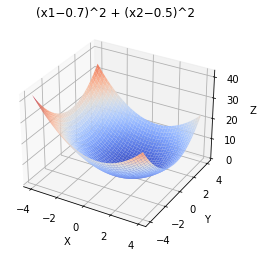

La función es convexa en el punto: ( 0.700000000000000 0.500000000000000 )
Se tiene un mínimo local en ( 0.700000000000000 0.500000000000000 )
-----------


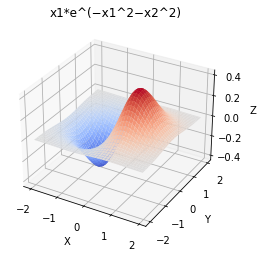

La función es convexa en el punto: ( -sqrt(2)/2 0 )
Se tiene un mínimo local en ( -sqrt(2)/2 0 )
La función es concava en el punto: ( sqrt(2)/2 0 )
Se tiene un máximo local en ( sqrt(2)/2 0 )


In [12]:
#https://www.matesfacil.com/UNI/varias_variables/extremos/extremos-varias-variables.html

def func1(x, y):
    return (x - 0.7)*(x - 0.7) + (y - 0.5)*(y - 0.5)

def func2(x1, x2):
    return x1 * math.pow(math.e, -(x1*x1) -(x2*x2))

def graficar_funcion_R3(funcion, titulo, inicio, fin):

    # Se definen las dimensiones del área a graficar
    x = y = np.arange(inicio, fin, 0.05)
    X, Y = np.meshgrid(x, y)
    zs = np.array([funcion(x,y) for x,y in zip(np.ravel(X), np.ravel(Y))])
    Z = zs.reshape(X.shape)

    # Operaciones para el manejo del gráfico
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X, Y, Z, cmap = cm.coolwarm)
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    plt.title(titulo)

    plt.show()
    
graficar_funcion_R3(func1, '(x1−0.7)^2 + (x2−0.5)^2', -4, 4)

from sympy import *
x, y = symbols('x,y')
def obtener_critico(funcion):
    'Usando sympy'
    derivada_fx = diff(funcion, x)
    derivada_fy = diff(funcion, y)
    x_dev = solve(Eq(derivada_fx, 0))
    y_dev = solve(Eq(derivada_fy, 0))
    respx=[]
    respy=[]
    if isinstance(x_dev[0], dict):
        for i in x_dev:
            for k,v in i.items():
                respx.append(v)
        for i in y_dev:
            for k,v in i.items():
                respy.append(v )
        return  respx,  respy
    return x_dev, y_dev
    
    

# def es_punto_max():
#     seg_derivada_x =

def evaluar_funct2d(funct):
    #obtener puntos criticos
    criticos_x, criticos_y = obtener_critico(funct)
    
    for i in range(len(criticos_x)):

        elem_x = criticos_x[i]
        elem_y = criticos_y[i]
        
        seg_derivada_x = diff(funct, x, 2)
        seg_derivada_x = seg_derivada_x.evalf(subs={x:elem_x, y:elem_y})#derivada_func2_xx(elem[0], elem[1])
        
        seg_derivada_y = diff(funct, y, 2)
        seg_derivada_y = seg_derivada_y.evalf(subs={x:elem_x, y:elem_y})#derivada_func2_yy(elem[0], elem[1])#diff(funct, y, 2)

        if(seg_derivada_x>0 and seg_derivada_y>0):
            print('La función es convexa en el punto: (', elem_x, elem_y, ')')
        elif(seg_derivada_x<0 and seg_derivada_y<0):
            print('La función es concava en el punto: (', elem_x, elem_y, ')')
            
        if(seg_derivada_x>0):
            print('Se tiene un mínimo local en (', elem_x, elem_y, ')')
        elif(seg_derivada_x<0):
            print('Se tiene un máximo local en (', elem_x, elem_y, ')')
    
evaluar_funct2d((x - 0.7)*(x - 0.7) + (y - 0.5)*(y - 0.5))

print('-----------')

graficar_funcion_R3(func2, 'x1*e^(−x1^2−x2^2)', -2, 2)

evaluar_funct2d(x * exp(-(x*x) -(y*y)))

2. (3 puntos) Implemente el algoritmo del descenso del gradiente con tensores de Pytorch

In [3]:
def decenso_gradiente(func, dev_x, dev_y, x, y, epochs=1000000, learning_rate=0.01, precision=0.00000000001, previous_step_size_x=1, previous_step_size_y=1):
    x_history = [x]
    y_history = [y]
    iterations = 0
    while previous_step_size_x > precision and previous_step_size_y > precision and iterations < epochs:
        x = x - learning_rate * dev_x(x_history[-1], y_history[-1])
        y = y - learning_rate * dev_y(x_history[-1], y_history[-1])
        previous_step_size_x = abs(x - x_history[-1])
        previous_step_size_y = abs(y - y_history[-1])
        iterations += 1
        x_history.append(x)
        y_history.append(y)
#         print(f'Epoca: {iterations}. a: {x} y b: {y}')
#         print(previous_step_size_x > precision, previous_step_size_y > precision, iterations < epochs)
    return x_history, y_history, iterations

3. (4 puntos) Para cada función:
	a) Escoja un coeficiente de aprendizaje ? que permita la convergencia
y reporte los resultados para 10 corridas, debe incluir:
		1) La cantidad de iteraciones necesarias para converge.
		2) El punto de convergencia.
        3) Reporte si convergio al punto correcto.

In [4]:
# Primera función 
# (x1−0.7)^2 + (x2−0.5)^2
print('La primera función (x1−0.7)^2 + (x2−0.5)^2 tiene punto de convergencia en: (0.7, 0.5)\n')
def get_initial_point(min_rango, max_rango):
    Theta = np.random.rand(2) * abs(max_rango - min_rango) - abs((max_rango - min_rango) / 2)
    return Theta[0], Theta[1]

#Valores del punto inicial generado aleatoriamente
x_initial, y_initial = get_initial_point(-4, 4)
cant_iteraciones = 10
for i in range(cant_iteraciones):
    print(f'Iteración número: {i}')
    print(f'Punto inicial x:{x_initial}, y:{y_initial}')
    num_epocas = 100000
    c_aprendizaje = 1*10**-i
    x_history, y_history, iterations = decenso_gradiente(func1, derivada_func1_x, derivada_func1_y, 
                                           x_initial, y_initial, num_epocas, c_aprendizaje)
    print(f'Resultado obtenido (x:{x_history[-1]}, y:{y_history[-1]})')
    print(f'Cantidad de etapas: {iterations}, con un coficiente de aprendizaje de {c_aprendizaje}')
    print('Convergio al punto correcto' if abs(x_history[-1] - 0.7) < 0.1e-3 and abs(y_history[-1] - 0.5) < 0.1e-3 else 'No convergio al punto correcto') 
    print()
    

La primera función (x1−0.7)^2 + (x2−0.5)^2 tiene punto de convergencia en: (0.7, 0.5)

Iteración número: 0
Punto inicial x:-1.962690064428089, y:2.8433392874615917
Resultado obtenido (x:-1.962690064428089, y:2.8433392874615917)
Cantidad de etapas: 100000, con un coficiente de aprendizaje de 1
No convergio al punto correcto

Iteración número: 1
Punto inicial x:-1.962690064428089, y:2.8433392874615917
Resultado obtenido (x:0.6999999999627264, y:0.5000000000328031)
Cantidad de etapas: 112, con un coficiente de aprendizaje de 0.1
Convergio al punto correcto

Iteración número: 2
Punto inicial x:-1.962690064428089, y:2.8433392874615917
Resultado obtenido (x:0.6999999994518388, y:0.5000000004824171)
Cantidad de etapas: 1104, con un coficiente de aprendizaje de 0.01
Convergio al punto correcto

Iteración número: 3
Punto inicial x:-1.962690064428089, y:2.8433392874615917
Resultado obtenido (x:0.6999999943331799, y:0.5000000049871683)
Cantidad de etapas: 9974, con un coficiente de aprendizaje de

In [7]:
# Segunda función 
# x1e^(−x1^2−x2^2)
print('La segunda función x1e^(−x1^2−x2^2) no es convecxa pero tiene un maximo y minimo en: [sqrt(1/2), 0], [-sqrt(1/2), 0]')
print(f'El punto minimo de la funcion es: x:{-math.sqrt(1/2)}, y:{0}\n')

#Valores del punto inicial generado aleatoriamente
x_initial, y_initial = get_initial_point(-1, 1)
cant_iteraciones = 10
for i in range(cant_iteraciones):
    print(f'Iteración número: {i}')
    print(f'Punto inicial x:{x_initial}, y:{y_initial}')
    num_epocas = 100000
    c_aprendizaje = 0.1*10**-i
    x_history, y_history, iterations = decenso_gradiente(func2, derivada_func2_x, derivada_func2_y, 
                                           x_initial, y_initial, num_epocas, c_aprendizaje)
    print(f'Resultado obtenido (x:{x_history[-1]}, y:{y_history[-1]})')
    print(f'Cantidad de etapas: {iterations}, con un coficiente de aprendizaje de {c_aprendizaje}')
    print('Convergio al punto correcto' if abs(x_history[-1] - -math.sqrt(1/2)) < 0.1e-3 and abs(y_history[-1] - 0) < 0.1e-3 else 'No convergio al punto correcto') 
    print()

La segunda función x1e^(−x1^2−x2^2) no es convecxa pero tiene un maximo y minimo en: [sqrt(1/2), 0], [-sqrt(1/2), 0]
El punto minimo de la funcion es: x:-0.7071067811865476, y:0

Iteración número: 0
Punto inicial x:0.31855457226806094, y:-0.29795157788440685
Resultado obtenido (x:-0.7071067811394194, y:-7.115333486902481e-06)
Cantidad de etapas: 129, con un coficiente de aprendizaje de 0.1
Convergio al punto correcto

Iteración número: 1
Punto inicial x:0.31855457226806094, y:-0.29795157788440685
Resultado obtenido (x:-0.7071067806226312, y:-1.4035627193085423e-05)
Cantidad de etapas: 1251, con un coficiente de aprendizaje de 0.010000000000000002
Convergio al punto correcto

Iteración número: 2
Punto inicial x:0.31855457226806094, y:-0.29795157788440685
Resultado obtenido (x:-0.7071067753774025, y:-4.297787900373349e-05)
Cantidad de etapas: 11242, con un coficiente de aprendizaje de 0.001
Convergio al punto correcto

Iteración número: 3
Punto inicial x:0.31855457226806094, y:-0.2979515

## B. Minimos cuadrados con tensores de Pytorch (6 puntos)
El ejercicio se va a realizar utilizando el conjunto de datos «Default of Credit Card Clients Dataset. Default Payments of Credit Card Clients in Taiwan from 2005». Se adjunta un archivo con los datos (defaultofcredit). Una descripción completa del conjunto de datos esta disponible en 
https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset.

1. Cargue el conjunto de datos defaultofcredit.csv, los targets (b) corresponden a la columna: default_payment_next_month.

In [2]:
import pandas as pd # TODOOOO pasar al inicio

# Se carga el archivo con los datos solicitados (defaultofcredit.csv) y se define
# a la columna "default_payment_next_month" como la objetivo.
defaultofcredit = pd.read_csv('defaultofcredit.csv', sep=';')
targets = defaultofcredit['default_payment_next_month']

2.  (1 punto) Explore el conjunto de datos, visualice algunas estadisticas y
verifique que no existan valores faltantes.

In [13]:
print('Primeros 5 datos del dataframe:')
defaultofcredit.head()

Primeros 5 datos del dataframe:


,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,0,689,0,0,0,0,1
1,120000,26,-1,2,0,0,0,2,2682,1725,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,34,0,0,0,0,0,0,29239,14027,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,37,0,0,0,0,0,0,46990,48233,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [14]:
print('Tipos de datos presentes en las columnas de los datos:')
defaultofcredit.dtypes

Tipos de datos presentes en las columnas de los datos:


LIMIT_BAL                     int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default_payment_next_month    int64
dtype: object

In [15]:
print('Datos estadísticos del dataframe:')
defaultofcredit.describe()
####################################### TODOO Eliminar los 0s?

Datos estadísticos del dataframe:


,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Gráfica con las relaciones de los datos de uno a uno


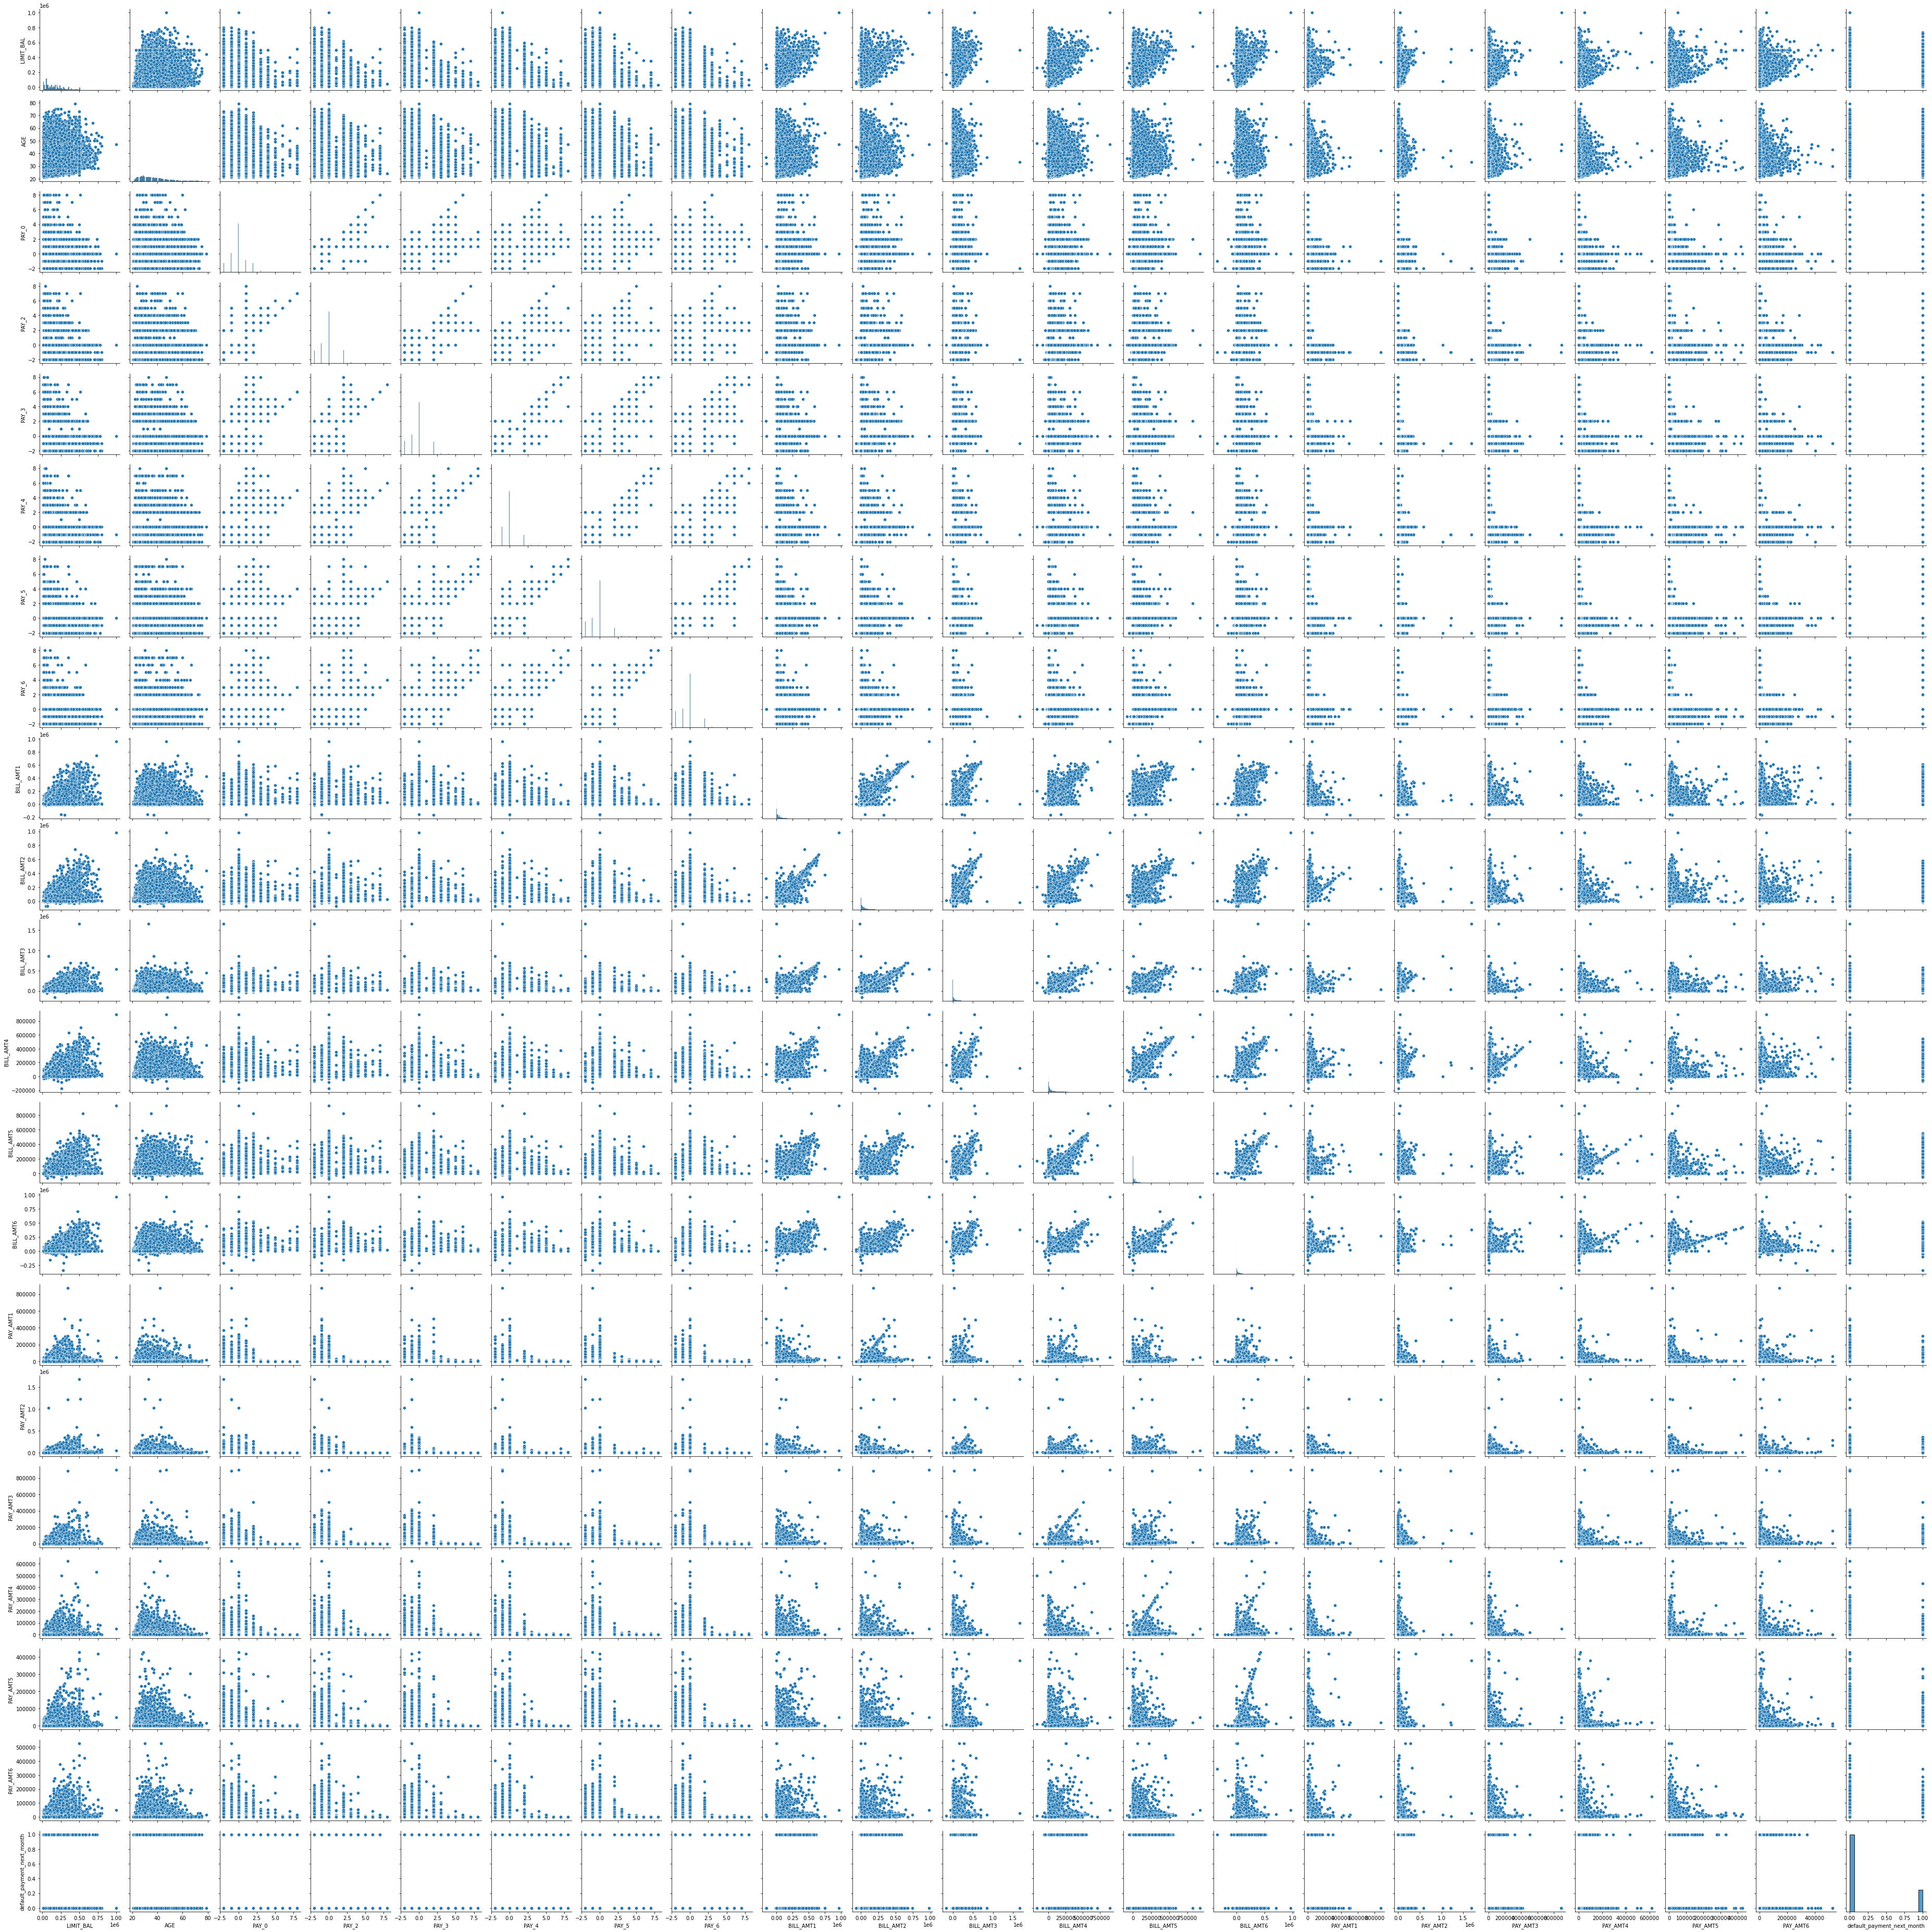

In [16]:
import seaborn as sns # TODOOOO pasar al inicio

print('Gráfica con las relaciones de los datos de uno a uno:')
sns.pairplot(defaultofcredit); # Se muestran todos los datos

Mapa de calor del dataset:


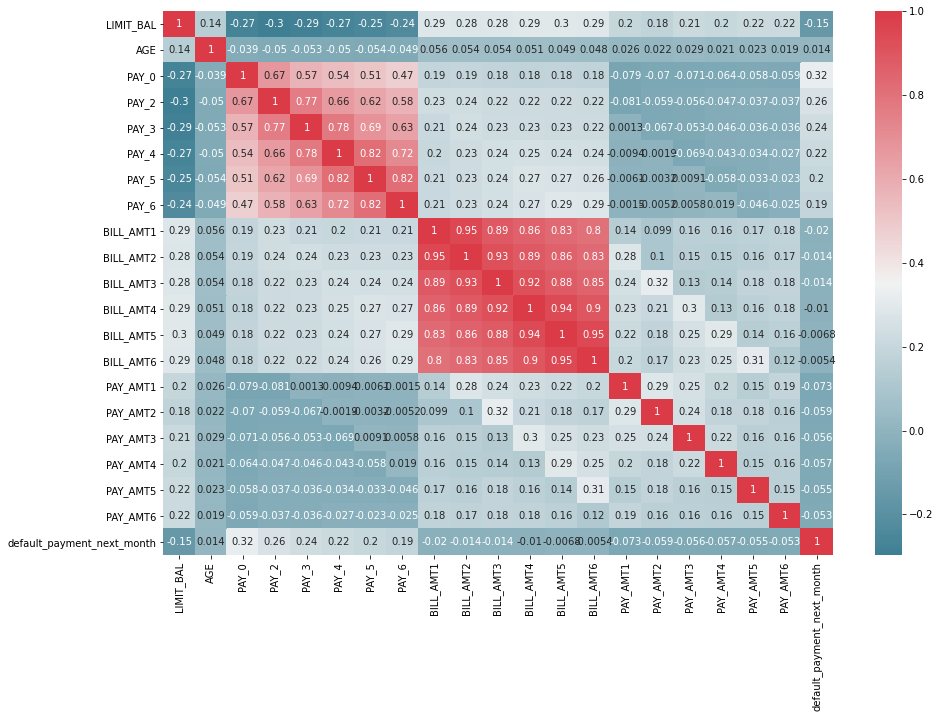

In [19]:
# Función para generar el mapa de calor de un conjunto de datos
def mapa_de_calor(df):
    _,ax=plt.subplots(figsize=(15,10))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df.corr(),annot=True,cmap=colormap)

print('Mapa de calor del dataset:')
mapa_de_calor(defaultofcredit)

3. (2 punto) Implemente en python la función $ wopt = estimateOptimunW(X,b) $ la cual recibe los datos y sus respuestas $ (X y b) $ , y estima el vector de pesos optimo w_opt usando mínimos cuadrados. Debe programar en python a nivel de operaciones matriciales y/o vectoriales, no debe invocar a una función pre-construida que calcule mínimos cuadrados. Utilice la función estimateOptimumW para calcular el wopt para los datos.

In [5]:
# Función que retorna una matriz de zeros de las dimensiones dadas.
def matriz_ceros(filas, columnas):
    return [([0]*columnas) for i in range(filas)]

# Función para multiplicar dos matrices
def multiplicar_matrices(matriz1, matriz2):
    
    # Si las matrices no se pueden multiplicar se retorna False
    if len(matriz1[0]) != len(matriz2):
        return False
    
    resultado = matriz_ceros(len(matriz1), len(matriz2[0]))
    for i in range(len(matriz1)):
        for j in range(len(matriz2[0])):
            for k in range(len(matriz2)):
                resultado[i][j] += matriz1[i][k] * matriz2[k][j]
    return resultado

# Función que retorna la matriz identidad de otra matriz
def calcular_identidad(matriz):
    
    # Si la matriz no es cuadrada se retorna False
    if len(matriz) != len(matriz[0]):
        return False
    
    resultado = matriz_ceros(len(matriz), len(matriz[0]))
    for i in range(len(matriz)):
        resultado[i][i] = 1
    return resultado

# Función para calcular la matriz transpuesta de otra matriz
def calcular_transpuesta(matriz):
    
    filas = len(matriz)
    columnas = len(matriz[0])
    transpuesta = matriz_ceros(columnas, filas)
    for i in range(filas):
        for j in range(columnas):
            transpuesta[j][i] = matriz[i][j]
    return transpuesta
    
# Método para calcular la inversa de una matriz.
def calcular_inversa(matriz):
    
    respuesta = calcular_identidad(matriz)
    for fd in range(len(matriz)):
        escalar_fd = 1.0 / matriz[fd][fd] if matriz[fd][fd] != 0 else 1
        for j in range(len(matriz)):
            matriz[fd][j] *= escalar_fd
            respuesta[fd][j] *= escalar_fd
        for i in list(range(len(matriz)))[0:fd] + list(range(len(matriz)))[fd+1:]:
            crScaler = matriz[i][fd]
            for j in range(len(matriz)):
                matriz[i][j] = matriz[i][j] - crScaler * matriz[fd][j]
                respuesta[i][j] = respuesta[i][j] - crScaler * respuesta[fd][j]
    return respuesta

# Función que calcula la pseudo-inversa de una matriz al basarse en sus propiedades.
def calcular_pseudo_inversa(matriz):
    
    transpuesta = calcular_transpuesta(matriz)
    inversa = calcular_inversa(multiplicar_matrices(transpuesta, matriz))
    return multiplicar_matrices(inversa, transpuesta)

# Función para estimar el óptimo W a utilizar. Se recibe X: la matriz con los valores target (1 o -1)
# y se recibe b: el resto de la matriz del dataset.
def estimateOptimunW(X, b):
    
    # Se calcula w = Pseudoinversa(X)*b
    samplesAllPinv = calcular_pseudo_inversa(X)
    wOpt = multiplicar_matrices(samplesAllPinv, b)
    
    # Se retorna w, un arreglo con los múltiples w.
    return wOpt

targets_procesado = calcular_transpuesta([[1.0 if i else -1.0 for i in targets]])
defaultofcredit_procesado = defaultofcredit.values.tolist()

w_optimo = estimateOptimunW(defaultofcredit_procesado, targets_procesado)

print('Los w óptimos son:')
print(*w_optimo, sep = "\n")

Los w óptimos son:
[-3.4670618955651833e-07]
[-0.023909913549645286]
[-0.006143759535476887]
[-0.003264870943783225]
[-0.006876320261869943]
[0.0013461101000039645]
[0.0014499383136095075]
[0.0102762049166729]
[-1.4235333679182e-07]
[-1.3115120431481366e-08]
[7.91487726618535e-08]
[-1.1344755122558568e-07]
[5.995307053067003e-08]
[-9.398128485951548e-08]
[-3.2115794871925566e-07]
[-9.993662799602615e-08]
[1.1319887773036854e-07]
[-2.3759147503902437e-07]
[-6.103619876969003e-08]
[-7.643162977595537e-08]
[1.9178647379942868]


4. (2 punto) Implemente función forward, la cual estima las salidas del modelo al hacer $ T=f(Xw opt) $. Donde la función $ f(x) $ se refiere a la función de activación, que decide a cual clase pertenece cada muestra, según el resultado del producto punto de las muestra y los pesos óptimos, en este caso simplemente usando la función signo o escalón, es decir:

    - $ f(x) = 1, si(x > 0) $
    - $ f(x) = -1, si (x <= 0) $

In [6]:
# Función para estimar la salida del modelo, usando la función de activación con los valores 1 y -1. 
# Se recibe SamplesAll: el resto de la matriz del dataset y se recibe wOpt: un arreglo con los w óptimos.
def forward(SamplesAll, wOpt):
    
    EstimatedTargets = multiplicar_matrices(SamplesAll, wOpt)
    EstimatedTargets = [[1.0 if i>0 else -1.0 for i in EstimatedTargets[j]] for j in range(len(EstimatedTargets))]

    return EstimatedTargets
  
EstimatedTargetsAll = forward(defaultofcredit_procesado, w_optimo)

print('Cantidad de elementos clasificados como 1:', EstimatedTargetsAll.count([1.]))
print('Cantidad de elementos clasificados como -1:', EstimatedTargetsAll.count([-1.]))

Cantidad de elementos clasificados como 1: 6636
Cantidad de elementos clasificados como -1: 23364


5. (1 punto) Evalué el error de predicción utilizando la distancia euclidiana.

In [7]:
# Función que retorna la distancia euclidiana entre dos valores.
def distancia_euclidiana(x1, x2):
    return math.sqrt((x2-x1)*(x2-x1))

# Método que suma el error usando la distancia euclidiana entre todos los valores de
# el target real y los obtenidos al usar la función forward.
def evaluateError(TargetsAll, EstimatedTargetsAll):
    
    error = 0
    for i in range(len(TargetsAll)):
        for j in range(len(TargetsAll[0])):
            error += distancia_euclidiana(TargetsAll[i][j], EstimatedTargetsAll[i][j])
            
    return error
    
print('Error usando la distancia euclidiana:', evaluateError(targets_procesado, EstimatedTargetsAll))

Error usando la distancia euclidiana: 0.0


## C. Perceptron de una capa con tensores de Pytorch (12 puntos)
 1. (10 puntos) Implemente el algoritmo del perceptron de una capa rescindiendo al máximo de estructuras de tipo for, usando en su lugar operaciones matriciales. **Debe implementarlo sin utilizar ninguna biblioteca, es decir en Pytorch no se puede usar ninguna clase o funcionalidad desarrollada por Pytorch o alguna otra biblioteca.**

In [8]:
# Función para calcular el producto punto entre dos vectores.
def producto_punto(vector1, vector2):
    
    if len(vector1) != len(vector2):
        print('No se puede realizar el producto punto')
    resultado = 0
    for i in range(len(vector1)):
        resultado += vector1[i]*vector2[i]
        
    return resultado

# Método para multiplicar un vector por un escalar.
def multiplicar_vector(escalar, vector):
    
    resultado = []
    for x in vector:
        resultado.append(escalar*x)
    return resultado

# Función que suma dos vectores y retorna el resultado.
def sumar_vectores(vector1, vector2):
    
    if len(vector1) != len(vector2):
        print('No se puede realizar la suma de vectores')
    resultado = []
    for i in range(len(vector1)):
        resultado.append(vector1[i] + vector2[i])
        
    return resultado

# Clase en la que se crearán las funciones del perceptrón.
class Perceptron:
    
    # Se define el factor de aprendizaje y el número de épocas que se utilizarán
    # para el entrenamiento del sistema.
    def __init__(self, fact_aprendizaje, num_epocas):
        self.fact_aprendizaje = fact_aprendizaje
        self.num_epocas = num_epocas
        
    # Función que ajusta al w del perceptrón para las estimaciones del sistema.
    def fit(self, X, y):
        
        # Arreglo de w que contendrá a los más cercanos al valor óptimo.
        self.w = [0]*(1 + len(X[0]))
        # Valores para registrar el comportamiento del perceptrón en las épocas.
        self.errores = []
        self.epoca_conv = -math.inf
        contador = 0
        
        for epoca in range(self.num_epocas):
            error = 0
            for xi, target in zip(X, y):
                # Operaciones para entrenar el sistema.
                update = self.fact_aprendizaje * (target - self.predict(xi))
                resultado = multiplicar_vector(update, xi)
                self.w[1:] = sumar_vectores(self.w[1:], resultado)
                self.w[0] += update
                error += int(update != 0.0)
            
            # Registrando el error en la época actual.
            if(self.errores != [] and abs(error - self.errores[-1]) < 0.1e-2):
                contador += 1
                if contador == 3:
                    self.epoca_conv = epoca - contador
                    break
            else:
                contador = 0
            self.errores.append(error)
            
    # Se usa la función escalón para que la salida sea 1 o -1.
    def predict(self, X):
        
        # Se usa una función escalón
        phi = 1.0 if self.net_input(X)>=0 else -1.0
        return phi
    
    # Función para calcular la salida del sistema recibiendo los valores X.
    def net_input(self, X):
        
        # Se calcula la salida del sistema para el estado actual.
        z = producto_punto(X, self.w[1:]) + self.w[0]
        return z

 2. Reporte los resultados del clasificador: Para probar su clasificador utilice cumulos de datos generados con la funcion createData disponible en el cuaderno de Jupyter 003_LeastSquares_ejemploV2.ipynb (directorio 014 y 015 Mínimos cuadrados) la cual implementa la generación de datos aleatorios. Tales datos serán utilizados como datos de prueba. Parametrice la cantidad de muestras, matriz de covarianza y medias. La meta es lograr que el perceptor clasifique bien los datos generados. Es decir construir un separador lineal de las clases.

In [9]:
from torch.distributions import constraints
from torch.distributions.distribution import Distribution
from torch.distributions.utils import _standard_normal, lazy_property
from torchvision import datasets, transforms
from torch.distributions import normal
from torch.distributions import multivariate_normal

"""
Crea la información (2 clases) para ser utilizadas para el entrenamiento, usando la distribución 
GMM (Gaussian Mixture Models). Se recibe numberSamplesPerClass; el número de muestras de las clases, 
mean1; la media de las muestras para la clase 1, mean2; la media de las muestras para la clase 2,
stds1; la desviación estandar de las muestras para la clase 1 y stds2; la desviación estandar de las 
muestras para la clase 2
"""
def createData(numberSamplesPerClass = 2, mean1 = [2, 2], mean2 = [6, 6], stds1 = [3, 3], stds2 = [2, 1]):
    '''
    Se crea la información con la distribución de Gauss.
    '''
    def createDataOneClass(means, covarianceMatrix, numberSamples):
        # Inicia el generador de datos bi gaussiano
        multiGaussGenerator = multivariate_normal.MultivariateNormal(means, covarianceMatrix)
        # Toma las muestras
        samples = multiGaussGenerator.sample(torch.Size([numberSamples]))
        return samples
   
    means = torch.zeros(2)

    # Unos para concatenar para el bias
    ones = torch.ones(numberSamplesPerClass, 1)
    means[0] = mean1[0]
    means[1] = mean1[1]
    # Creación de la matriz de covarianza con la identidad
    covarianceMatrix = torch.eye(2)
    covarianceMatrix[0, 0] = stds1[0]
    covarianceMatrix[1, 1] = stds1[1]
    samplesClass1 = createDataOneClass(means, covarianceMatrix, numberSamplesPerClass)
    means[0] = mean2[0]
    means[1] = mean2[1]
    covarianceMatrix[0, 0] = stds2[0]
    covarianceMatrix[1, 1] = stds2[1]
    samplesClass2 = createDataOneClass(means, covarianceMatrix, numberSamplesPerClass)
    # Se concatenan los unos para el bias
    samplesClass1Bias = torch.cat((ones, samplesClass1), 1)
    samplesClass2Bias = torch.cat((ones, samplesClass2), 1)
    samplesAll = torch.cat((samplesClass1, samplesClass2), 0)
    
    # Se grafican las clases
    plt.scatter(samplesClass1[:, 0], samplesClass1[:, 1], marker='^', c='yellow')
    plt.scatter(samplesClass2[:, 0], samplesClass2[:, 1], marker='o', c='darkmagenta')
    plt.show()
  
    # Se crean muestras con bias
    samplesAllBias = torch.cat((samplesClass1Bias, samplesClass2Bias), 0)
    
    # Se crean los targets
    targetsClass1 = torch.ones(numberSamplesPerClass, 1)
    targetsClass2 = -1 * torch.ones(numberSamplesPerClass, 1)
    targetsAll = torch.cat((targetsClass1, targetsClass2), 0)
    
    return (targetsAll, samplesAllBias)

	2.1. (3 puntos) Realice 2 pruebas con distintas distancias de separación entre las muestras de las clases, con una prueba linealmente separable, y otra no, y documente el numero de muestras mal clasificadas y la cantidad de iteraciones para converger. Defina el conjunto de muestras de entrenamiento como el 70 % de las muestras aleatoriamente seleccionadas, y el resto utilícelas como muestras de prueba.
    

Grupo 1:


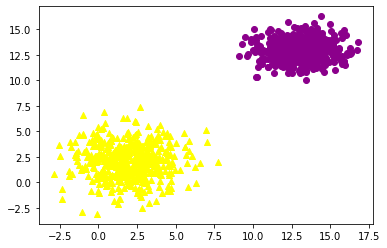

Grupo 2:


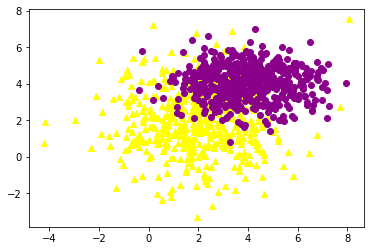

In [14]:
# Se crea el primer grupo.

import random #################### TODOO, se pasa al inicio

# Cantidad de datos a crear para cada clase.
cantidad_datos = 500

# Se usa la función 'createData' para crear las clases.
print('Grupo 1:')
(TargetsAll, SamplesAll) = createData(numberSamplesPerClass = cantidad_datos, mean2 = [13, 13])
TargetsAll, SamplesAll = TargetsAll.tolist(), SamplesAll.tolist()

# Función para definir la seed del random (es necesario que las dos listas se ordenen igual).
proporcion = lambda : 0.7

# Se randomizan las posiciones de las clases.
random.shuffle(TargetsAll, proporcion)
random.shuffle(SamplesAll, proporcion)

TargetsAll = [i.pop() for i in TargetsAll]
SamplesAll = [i[1:] for i in SamplesAll]

# Se dividen las clases en una parte para entrenamiento y otra para pruebas.
indice_entrenamiento = int(2*cantidad_datos*0.3)

X_train, Y_train = TargetsAll[indice_entrenamiento:], SamplesAll[indice_entrenamiento:]
X_test, Y_test = TargetsAll[:indice_entrenamiento], SamplesAll[:indice_entrenamiento]

# Se crea el segundo grupo.

# Se usa la función 'createData' para crear las clases.
print('Grupo 2:')
(TargetsAllB, SamplesAllB) = createData(numberSamplesPerClass = cantidad_datos, mean2 = [4, 4])
TargetsAllB, SamplesAllB = TargetsAllB.tolist(), SamplesAllB.tolist()

# Se randomizan las posiciones de las clases.
random.shuffle(TargetsAllB, proporcion)
random.shuffle(SamplesAllB, proporcion)

TargetsAllB = [i.pop() for i in TargetsAllB]
SamplesAllB = [i[1:] for i in SamplesAllB]

# Se dividen las clases en una parte para entrenamiento y otra para pruebas.
X_trainB, Y_trainB = TargetsAllB[indice_entrenamiento:], SamplesAllB[indice_entrenamiento:]
X_testB, Y_testB = TargetsAllB[:indice_entrenamiento], SamplesAllB[:indice_entrenamiento]

In [15]:
# Función para graficar la mejor línea estimada por el perceptron. Se recibe SamplesAll; la información de la 
# que se estimará una línea para dividir en dos clases los datos, el perceptrón que se ha entrenado para estimar
# los datos y targets; las clases verdaderas en un arreglo. 
def graficar_mejor_linea(SamplesAll, perceptron, targets):
    
    SamplesAll = torch.tensor(SamplesAll)
    targets = torch.tensor(targets)
    wOpt = torch.tensor(perceptron.w)
    
    # Se calcula la línea que divide a los datos.
    Y = (-wOpt[0] - (wOpt[1] * SamplesAll)) / wOpt[2] ##### TODO pasar esta madre a nuestras funciones o como?
    
    # Se suma la cantidad de datos que fueron mal clasificados para notificarlo.
    fallos = 0
    for i in range(len(SamplesAll)):
        if perceptron.predict(SamplesAll[i]) != targets[i]:
            fallos += 1
    
    print('Número de datos mal clasificados:', fallos)
    
    # Se grafican las clases junto con la línea que los divide.
    plt.figure()
    plt.title('Clasificación lineal de los datos generados')
    plt.scatter(SamplesAll[:, 0].numpy(), 
                SamplesAll[:, 1].numpy(), 
                marker="o", c=targets)
    plt.plot(SamplesAll.numpy(), Y.numpy(), "r-")

Número de datos mal clasificados: 0


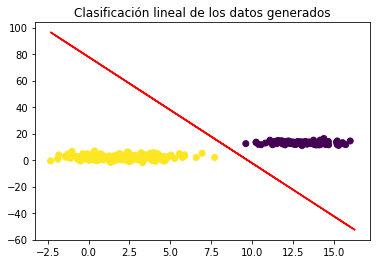

In [16]:
# Se define el factor de aprendizaje y la cantidad de épocas a utilizar.
factor_aprendizaje = 0.05
epocas = 100

# Se usa un perceptron para ser entrenado y clasificar las clases del primer grupo.
PerceptronA = Perceptron(factor_aprendizaje, epocas)
PerceptronA.fit(Y_train, X_train)

# Se grafica utilizando únicamente los datos de prueba.
graficar_mejor_linea(Y_test, PerceptronA, X_test)

Número de datos mal clasificados: 129


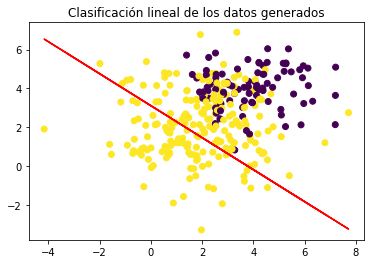

In [18]:
# Se usa un perceptron para ser entrenado y clasificar las clases del segundo grupo.
PerceptronB = Perceptron(factor_aprendizaje, epocas)
PerceptronB.fit(Y_trainB, X_trainB)

# Se grafica utilizando únicamente los datos de prueba.
graficar_mejor_linea(Y_testB, PerceptronB, X_testB)

    
	2.2. (2 puntos) Grafique el error o perdida de entrenamiento de al menos dos corridas, con todas las iteraciones de esas corridas. Ejemplo de gráfica de error por época:
<img src="./datos/ejemplo_grafica">

Gráfica del error para el primer grupo:


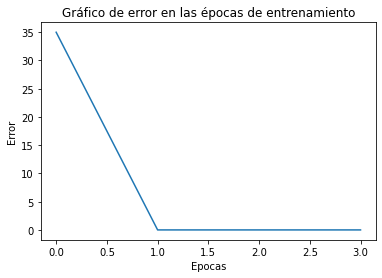

El programa convergió en la época: 1

Gráfica del error para el segundo grupo:


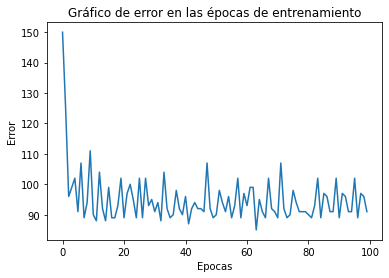

El programa no convergió


In [31]:
print('Gráfica del error para el primer grupo:')
plt.figure()
plt.plot(PerceptronA.errores)
plt.xlabel('Epocas')
plt.ylabel('Error')
plt.title('Gráfico de error en las épocas de entrenamiento')
plt.show()

if PerceptronA.epoca_conv != -math.inf:
    print('El programa convergió en la época:', PerceptronA.epoca_conv)
else:
    print('El programa no convergió')

print()

print('Gráfica del error para el segundo grupo:')
plt.figure()
plt.plot(PerceptronB.errores)
plt.xlabel('Epocas')
plt.ylabel('Error')
plt.title('Gráfico de error en las épocas de entrenamiento')
plt.show()

if PerceptronB.epoca_conv != -math.inf:
    print('El programa convergió en la época:', PerceptronB.epoca_conv)
else:
    print('El programa no convergió')

## D. Redes neuronales convolucionales (16 puntos)
**Utilice PyTorch** para implementar una red neuronal profunda para clasificar imágenes utilizando capas convolucionales. 
Para el ejercicio seleccione alguno de los siguientes conjuntos de datos:

 - Natural Images: https://www.kaggle.com/prasunroy/natural-images
 - Dogs & Cats images: https://www.kaggle.com/chetankv/dogs-cats-images
 - The Oxford-IIIT Pet Dataset: https://www.kaggle.com/devdgohil/the-oxfordiiit-pet-dataset
- Intel Image Classification: https://www.kaggle.com/puneet6060/intel-image-classification
- Flower Color Images: https://www.kaggle.com/olgabelitskaya/flower-color-images

Realice las siguientes actividades vistas en clase:

1. (2 puntos) Cargar y normalizar los datos.

In [2]:
from torchvision.datasets import ImageFolder
from torchvision import transforms
import torchvision
from torch.utils.data import DataLoader
import torch.nn as nn

DATA_DIR = './datos/dataset/training_set'
TEST_DATA_DIR = './datos/dataset/test_set'

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Resize((100,100)),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

dataset = ImageFolder(DATA_DIR, transform=transform)
trainloader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=2)

test_dataset = ImageFolder(TEST_DATA_DIR, transform=transform)
testloader = DataLoader(test_dataset, batch_size=4, shuffle=False, num_workers=2)

classes = ('gatito', 'perrito')# Poner gato, perro

2. (2 puntos) Explorar los datos

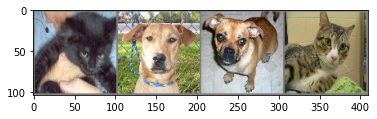

gatito
torch.Size([3, 104, 410])


In [3]:
# Funciones para desplegar algunas imágenes de forma aleatoria. 

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# obtener imágenes del conjunto de entrenamiento al azar
dataiter = iter(trainloader)
images, labels = dataiter.next()

# mostrar las imágenes
imshow(torchvision.utils.make_grid(images))

# mostrar las etiquetas
print(' '.join('%5s' % classes[labels[j]] for j in range(1)))

print(torchvision.utils.make_grid(images).shape)

3. (2 puntos) Definir la red convolucional

In [4]:
# Crear el modelo de aprendizaje profundo, se crea una clase 
# que envuelve la clase nn.Module 

class Net(nn.Module):
    # Modelo de red convolucional.
    # :params
    #    torch.nn.Module clase que implenta la funionalidad de
    #    redes neuronales de Pytorch 

    def __init__(self):
        super(Net, self).__init__()

        #torch.nn.Conv2d(in_channels, out_channels, kernel_size...
        self.conv1 = nn.Conv2d(3, 6, 5)#nn.Conv2d(3, 6, 5) 6 a 12

        #torch.nn.MaxPool2d(kernel_size, stride,...        
        self.pool = nn.MaxPool2d(2, 2)  

        #torch.nn.Conv2d(in_channels, out_channels, kernel_size...
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        #Capas perceptrón del modelo
        self.fc1 = nn.Linear(16 * 22 * 22, 120) # 16*9*9
        self.fc2 = nn.Linear(120, 84)
        
        #Salida a 10 clases 
        self.fc3 = nn.Linear(84, 2)

    def forward(self, x):
        # Implementa la función de activación y realiza el pase hacia adelante de la red
        # :param
        #   x : datos de la imagen a procesar.
        
        #Pase de la entrada por todas las capas de la red.
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(x.size(0), 16 * 22 * 22)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

4. (2 puntos) Definir los hiperparametros, por ejemplo, función de perdida,
el optimizador, entre otros.

In [5]:
import torch.optim as optim ########## TODO pasarlo arriba

# Se utiliza el criterio CrossEntropyLoss de la biblioteca de torch.
criterion = nn.CrossEntropyLoss()
# Utilizamos el optimizador SGD (Stochastic Gradient Descent) de la biblioteca de torch.
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

5. (2 puntos) Entrenar la red

[1,  1000] pérdida: 0.690
[1,  2000] pérdida: 0.679
[2,  1000] pérdida: 0.655
[2,  2000] pérdida: 0.629
[3,  1000] pérdida: 0.598
[3,  2000] pérdida: 0.588
[4,  1000] pérdida: 0.545
[4,  2000] pérdida: 0.511
[5,  1000] pérdida: 0.466
[5,  2000] pérdida: 0.472
[6,  1000] pérdida: 0.390
[6,  2000] pérdida: 0.433
[7,  1000] pérdida: 0.304
[7,  2000] pérdida: 0.355
[8,  1000] pérdida: 0.204
[8,  2000] pérdida: 0.238
[9,  1000] pérdida: 0.131
[9,  2000] pérdida: 0.180
[10,  1000] pérdida: 0.089
[10,  2000] pérdida: 0.112
[11,  1000] pérdida: 0.057
[11,  2000] pérdida: 0.102
Fin del entrenamiento


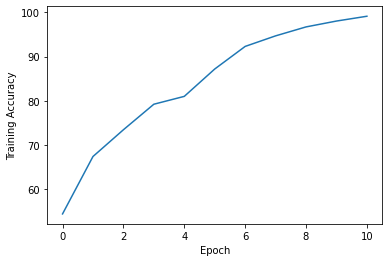

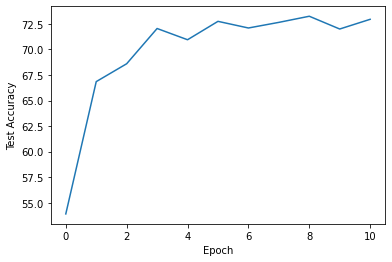

In [6]:
import torch.nn.functional as F

def calc_acc(loader):
    correct = 0
    total = 0
    for data in loader:
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    return ((100*correct)/total)

# cantidad de ciclos de entrenamiento o épocas
numEpoch = 11 # 

train_acc = []
test_acc = []
for epoch in range(numEpoch):  
    
    running_loss = 0.0
    
    for i, data in enumerate(trainloader, 0):
        
        # obtener los datos de entrada; 
        # data es una lista de la forma [inputs, labels]
        inputs, labels = data

        # inicializar los parámetros del gradiente.
        optimizer.zero_grad()

        # Se realizan las predicciones con el modelo. 
        # Este código ejecuta el forward de las entradas.
        outputs = net(inputs)
        
        # Se calcula la pérdida utilizando Cross Entropy Loss
        loss = criterion(outputs, labels)       
        loss.backward()
        
        #El optimizador realiza las actualizaciones a través del método step().
        optimizer.step()

        # imprimir estadisticas
        running_loss += loss.item()
        if i % 1000 == 999:    # imprimir mensaje cada 2000 mini-batches
            print('[%d, %5d] pérdida: %.3f' %
                  (epoch + 1, i + 1, running_loss / 1000))
            running_loss = 0.0
            
    train_acc.append(calc_acc(trainloader))
    test_acc.append(calc_acc(testloader))
            
print('Fin del entrenamiento')

plt.figure()
plt.plot(train_acc)
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.savefig('train_loss.png')
plt.show()

plt.figure()
plt.plot(test_acc)
plt.xlabel('Epoch')
plt.ylabel('Test Accuracy')
plt.savefig('test_loss.png') ############# TODO poner en español?
plt.show()

6. (3 puntos) Evaluar el modelo resultante Accuracy, Precision, Recall y F1-score (investigue como se utilizan estas medidas en clasificación)

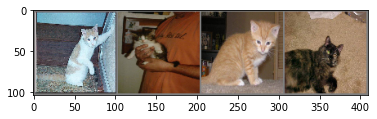

Etiqueta verdadera:  gatito gatito gatito gatito
Predicción:  perrito perrito gatito gatito
Exactitud (accuracy): 0.728
Exhaustividad (recall): 0.698
Precisión (precision): 0.7425531914893617
Puntuación f1 (f1-score): 0.7195876288659793
Exactitud: 0.7295
Precisión en gatito : 0.71671388101983
Precisión en perrito : 0.7438894792773645
Exhaustividad (Recall) en gatito : 0.759
Exhaustividad (Recall) en perrito : 0.7
F1-score en gatito : 0.7372510927634774
F1-score en perrito : 0.7212776919113858


In [8]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# imprimir algunos ejemplos y la etiqueta original (la verdad)
imshow(torchvision.utils.make_grid(images))
print('Etiqueta verdadera: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicción: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

# Accuracy

def accuracyf(loader):
    correct = 0
    total = 0
    for data in loader:
        inputs, labels = data
        outputs = net(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    return (correct/total)

# Precision

true_positives = 0
false_positives = 0
true_negatives = 0
false_negatives = 0

# true_positives_dogs = list(0. for i in range(2))
# false_positives_dogs = list(0. for i in range(2))
# true_negatives_dogs = list(0. for i in range(2))
# false_negatives_dogs = list(0. for i in range(2))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        #print(predicted, c)
        for i in range(2): # TODO batches constante                
            label = labels[i]
            if predicted[i] == labels[i] == 1:
                true_positives += 1
            elif predicted[i] == 1 and labels[i] == 0:
                false_positives += 1
            elif predicted[i] == labels[i] == 0:
                true_negatives += 1
            else:
                false_negatives += 1

accuracy = (true_positives+true_negatives)/(true_positives+false_positives+true_negatives+false_negatives)
recall = true_positives/(true_positives+false_negatives)
precision = true_positives/(true_positives+false_positives)
f1_score = 2*(recall*precision)/(recall+precision)

print('Exactitud (accuracy):', accuracy)
print('Exhaustividad (recall):', recall)
print('Precisión (precision):', precision)
print('Puntuación f1 (f1-score):', f1_score)

def precision(loader, current_class): # 0 para gato y 1 para perro
    correct = 0
    total = 0
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1) ## [0, 1, 0, 1]
        c = (predicted == labels).squeeze() ## [true, true, false, false]
        
        for i in range(4): # TODO batches constante
            if predicted[i] == current_class:
                correct += c[i].item()
                total += 1
    return (correct/total)

# Recall

def recall(loader, current_class):
    correct = 0
    total = 0
    for data in testloader:
        images, labels = data
        outputs = net(images) ## [0, 1, 1, 0]
        _, predicted = torch.max(outputs, 1) ## [0, 1, 0, 1]
        c = (predicted == labels).squeeze() ## [true, true, false, false]
        for i in range(4): # TODO batches constante
            if labels[i] == current_class:
                correct += c[i].item()
                total += 1
    return (correct/total)

# F1-score

def f1_score(loader, current_class):
    return 2*((precision(testloader, current_class) * 
               recall(testloader, current_class))/
              (precision(testloader, current_class) + 
               recall(testloader, current_class)))

print('Exactitud:', accuracyf(testloader))
for i in range(2):
    print('Precisión en',classes[i], ':', precision(testloader, i))
for i in range(2):
    print('Exhaustividad (Recall) en',classes[i], ':', recall(testloader, i))
for i in range(2):
    print('F1-score en', classes[i], ':', f1_score(testloader, i))

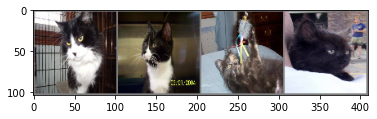

Etiqueta verdadera:  gatito gatito gatito gatito
Predicción:  gatito perrito perrito gatito


In [60]:
images, labels = dataiter.next()

# imprimir algunos ejemplos y la etiqueta original (la verdad)
imshow(torchvision.utils.make_grid(images))
print('Etiqueta verdadera: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

outputs = net(images)

_, predicted = torch.max(outputs, 1)

print('Predicción: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

7. (3 puntos) Presentar al menos cuatro conclusiones.

 - Se realizaron diversas pruebas en cuanto al tamaño de las imágenes a procesar, llegamos a la conclusión de que los tamaños muy pequeños mostraban resultados pobres, mientras que al aumentar la cantidad de pixeles se llegó a un momento en el que concordamos que esta no estaba afectando realmente a la precisión de nuestros modelos (entretanto que el tiempo de entrenamiento aumentaba cada vez más).

 - En los datos de prueba se encontraron diversas incongruencias con las imágenes; en las carpetas de prueba de perros y de gatos se descubrieron varias imágenes que no correspondían a ninguno de los dos animales (imágenes de logos, muros, personas...). Esto afecta a nuestro reporte de resultados y sería necesario depurar ambas carpetas manualmente con el fin de resolver este error.

 - Los valores de la precisión del modelo son relativamente altos (rondan el 70%), lo que significa que nuestro modelo es capaz de indentificar correctamente a la mayoría de imágenes de gatos y de perros que reciba como entrada. Sin embargo, no se alcanza la calidad que se esperaría de un programa en producción.

In [ ]:
# Cantidad de pixeles en las imágenes no parecio mejorar el resultado y el tiempo de procesamiento aumentó significativamnete
# Los resultados mostraron una mayor precisión en el momento de evaluar la imagen de un gato. Esto se podría deber porque las imagenes de prueba muestran a perros muy peludos.
# En ocaciones la gráfica sobre el error en las épocas tenía patrones muy distintos de una época a otra (altibajos constantes). Se podría deber al orden de las imágenes. Ya que fue lo que se cambió en las diferentes corridas.
# En los datos de prueba se encontraron varias incongruencias (entre las imágenes erroneas están: dogs4344, dogs4367, dogs4324, cats4688). Esto podría afectar de manera muy negativa el rendimiento de nuestro sistema.
# En las gráficas sobre los errores sobre las épocas constantemente se puede observar una menor precisión en los datos de prueba comparados con los de entrenamiento. Esto es esperable en cualquier programa de este tipo.

Se realizaron diversas pruebas en cuanto al tamaño de las imágenes a procesar, llegamos a la conclusión de que los tamaños muy pequeños mostraban resultados pobres, mientras que al aumentar la cantidad de pixeles se llegó a un momento en el que concordamos que esta no estaba afectando realmente a la precisión de nuestros modelos (entretanto que el tiempo de entrenamiento aumentaba cada vez más).



#Cantidad de imágenes clasificadas correctamente.
correct = 0
total = 0

with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Exactitud de la red en las 10000 imágenes de prueba: %d %%' % (
    100 * correct / total))

##

class_correct = list(0. for i in range(2))
class_total = list(0. for i in range(2))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        print(c)
        for i in range(2): # TODO batches constante                
            label = labels[i]
            #print(label)
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(2):
    print('Exactitud en %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))